## In this exercise, we explore the website: https://books.toscrape.com/index.html and extract books and its prices using WebScrapping techniques.

We use python library called "BeautifulSoup" to do webscrapping. In the end we use seaborn library to make a bar graph.

In [ ]:
import requests
from bs4 import BeautifulSoup


In [2]:
#Now let's set the URL of the page we're scraping, make a request to get the HTML and parse it
url = "https://books.toscrape.com/index.html"
print(url)
response = requests.get(url)
print(response)
html = response.content
scrapped = BeautifulSoup(html, 'html.parser')
print(scrapped)

https://books.toscrape.com/index.html
<Response [200]>
<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/style

In [3]:
#Get the title
scrapped.find("title")

<title>
    All products | Books to Scrape - Sandbox
</title>

In [4]:
#Get the title without tag
scrapped.find("title").text

'\n    All products | Books to Scrape - Sandbox\n'

In [5]:
#Get the title without tag without "\n"
# use function called "strip()"
page_title = scrapped.find("title").text.strip()
print(page_title)

All products | Books to Scrape - Sandbox


In [23]:
H = scrapped.find("article", class_="product_pod")
print(H)

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>


In [6]:
articles = scrapped.find_all("article", class_="product_pod")

In [29]:
for article in articles:
    print(article.h3.a.text)

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


In [7]:
for article in articles:
    price = article.find("div",class_="product_price").p.text
    price = float(price.lstrip("£"))
    print(price)
    

51.77
53.74
50.1
47.82
54.23
22.65
33.34
17.93
22.6
52.15
13.99
20.66
17.46
52.29
35.02
57.25
23.88
37.59
51.33
45.17


In [20]:
import numpy as np
book = []
X = np.array([])
Y = np.array([])
for article in articles:
    price = article.find("div",class_="product_price").p.text
    price = float(price.lstrip("£"))
    BookName = article.h3.a.text
    print(BookName, price)
    book.append({BookName:price})
    X=np.append(X,price)
    Y=np.append(Y,BookName)

print(X)

A Light in the ... 51.77
Tipping the Velvet 53.74
Soumission 50.1
Sharp Objects 47.82
Sapiens: A Brief History ... 54.23
The Requiem Red 22.65
The Dirty Little Secrets ... 33.34
The Coming Woman: A ... 17.93
The Boys in the ... 22.6
The Black Maria 52.15
Starving Hearts (Triangular Trade ... 13.99
Shakespeare's Sonnets 20.66
Set Me Free 17.46
Scott Pilgrim's Precious Little ... 52.29
Rip it Up and ... 35.02
Our Band Could Be ... 57.25
Olio 23.88
Mesaerion: The Best Science ... 37.59
Libertarianism for Beginners 51.33
It's Only the Himalayas 45.17
[51.77 53.74 50.1  47.82 54.23 22.65 33.34 17.93 22.6  52.15 13.99 20.66
 17.46 52.29 35.02 57.25 23.88 37.59 51.33 45.17]


In [21]:
print(book)

[{'A Light in the ...': 51.77}, {'Tipping the Velvet': 53.74}, {'Soumission': 50.1}, {'Sharp Objects': 47.82}, {'Sapiens: A Brief History ...': 54.23}, {'The Requiem Red': 22.65}, {'The Dirty Little Secrets ...': 33.34}, {'The Coming Woman: A ...': 17.93}, {'The Boys in the ...': 22.6}, {'The Black Maria': 52.15}, {'Starving Hearts (Triangular Trade ...': 13.99}, {"Shakespeare's Sonnets": 20.66}, {'Set Me Free': 17.46}, {"Scott Pilgrim's Precious Little ...": 52.29}, {'Rip it Up and ...': 35.02}, {'Our Band Could Be ...': 57.25}, {'Olio': 23.88}, {'Mesaerion: The Best Science ...': 37.59}, {'Libertarianism for Beginners': 51.33}, {"It's Only the Himalayas": 45.17}]


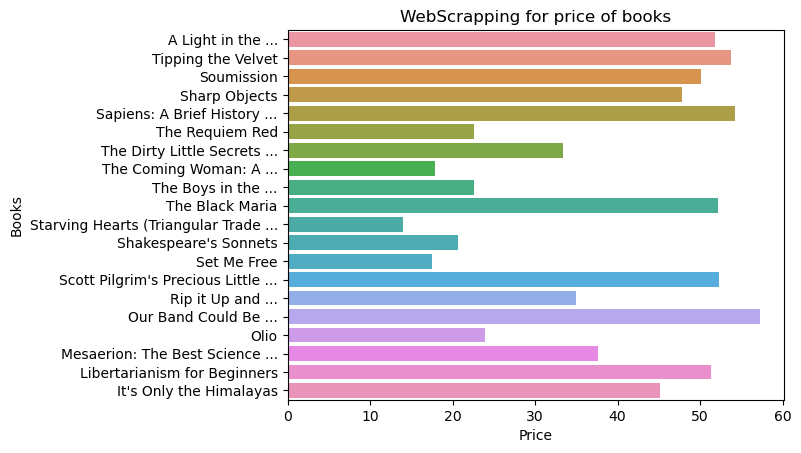

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.barplot(X,Y)

ax = sns.barplot(y=Y, x=X)
ax.set(xlabel ="Price", ylabel = "Books", title ='WebScrapping for prices of books')
plt.show()
